<i align="center">

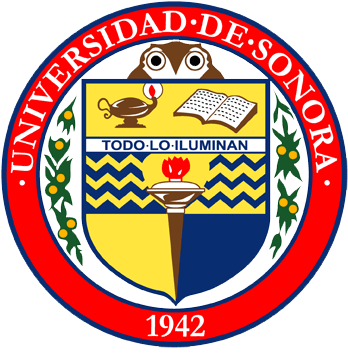

<t align="center">

# **Universidad de Sonora**

<t align="center">

# **El Indice de Marginalización de México**

<i align="center">

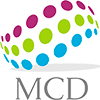


<t align="center">

# **Curso Propedéutico de Programación** 


<t align="center">

# Lic. Eduardo Gonzalez Olea
# Lic. José Carlos Barreras Maldonado



**a. Descargar y leer el archivo de base de datos por municipio 2020 del índice de marginación desde la página de descargas del gobierno federal mexicano en un dataframe. Los datos se encuentran en la pestaña "IMM 2020".**

In [1]:
import pandas as pd


# Read the Excel file with the specified header row
df = pd.read_excel("http://www.conapo.gob.mx/work/models/CONAPO/Marginacion/Datos_Abiertos/Municipio/IMM_2020.xls", header=5)
df.describe(include='all')
df = df.replace("—", 0)
#df = df['GM_2020'].replace("0", 'Muy bajo')
df['IM_2020'] = df['IM_2020'].astype(float)
df['IMN_2020'] = df['IMN_2020'].astype(float)
df = df.rename(columns={"Unnamed: 17": "lugar_contexto_nacional"})
df = df.dropna()


**b. Mostrar la descripción del DataFrame (medias, máximos mínimos, etc...) mostrar algunos hallazgos interesantes de la simple inspección visual y por estadísticas básicas de los datos.**

Descripción del dataset

In [11]:
df.describe()

,CVE_MUN,POB_TOT,ANALF,SBASC,OVSDE,OVSEE,OVSAE,OVPT,VHAC,PL.5000,PO2SM,IM_2020,IMN_2020,lugar_contexto_nacional
count,2469.000000,2.469000e+03,2469.000000,2469.000000,2469.000000,2469.000000,2469.000000,2469.000000,2469.000000,2469.000000,2469.000000,2469.000000,2469.000000,2469.00000
mean,19324.164844,5.103849e+04,10.164466,45.853026,3.159963,1.500793,6.118145,7.987232,26.566286,69.900469,82.143854,53.955581,0.844869,1235.00000
std,7382.892458,1.469907e+05,7.633633,13.981594,5.289299,2.769167,9.245995,8.973591,10.586540,35.267726,11.830444,3.904590,0.061140,712.88323
min,1001.000000,8.100000e+01,0.353446,5.535137,0.000000,0.000000,0.000000,0.000000,3.950392,0.000000,28.453113,21.406635,0.335198,1.00000
25%,14079.000000,4.489000e+03,4.427755,35.737568,0.651869,0.366077,0.878499,1.654653,18.725100,40.129696,74.615600,51.844432,0.811812,618.00000
50%,20226.000000,1.355200e+04,8.202762,46.339439,1.428250,0.828157,2.452316,4.714141,25.000000,100.000000,84.643266,54.423506,0.852196,1235.00000
75%,24027.000000,3.528400e+04,13.787294,55.856378,3.342618,1.678328,7.285869,11.029646,32.820816,100.000000,91.620112,56.696126,0.887782,1852.00000
max,32058.000000,1.922523e+06,53.071253,88.328076,64.450424,53.065463,81.788441,68.149764,69.564018,100.000000,100.000000,62.397145,0.977052,2469.00000


*1. Número de municipios por estado*

<t align=justify>

Los distintos estados presentan valores graduales en su cantidad de municipios. Esto implica que hay estados con pocos municipios, con una cantidad intermedia y con muchos municipios. Pocos estados poseen comparten un mismo número municipios. En términos estádisticos: lo datos presentan alta variabilidad. Notar que Oaxaca se destaca por mucho como el estado con mayor número de municipios.

In [2]:
municipios_por_estado = df['NOM_ENT'].value_counts()
municipios_por_estado.columns = ['NOM_ENT', 'Num_Municipios']
print(municipios_por_estado)


Oaxaca                             570
Puebla                             217
Veracruz de Ignacio de la Llave    212
México                             125
Jalisco                            125
Chiapas                            124
Michoacán de Ocampo                113
Yucatán                            106
Hidalgo                             84
Guerrero                            81
Sonora                              72
Chihuahua                           67
Tlaxcala                            60
San Luis Potosí                     58
Zacatecas                           58
Nuevo León                          51
Guanajuato                          46
Tamaulipas                          43
Durango                             39
Coahuila de Zaragoza                38
Morelos                             36
Nayarit                             20
Querétaro                           18
Sinaloa                             18
Tabasco                             17
Ciudad de México         

*2. Porcentaje de población sin educación básica por estado*

<t align=justify>


Tal como en el caso del número de municipios, los estados presentan un valor gradual en sus valores de porcentaje de la población sin educación básica. Al tratarse de valores porcentuales, es de esperarse que la separación entre los valores máximo y mínimo sea menor. Sin embargo, notamos que los valores mínimos se encuentran alrededor del 20 porciento, mientras que los valores máximos son de alrededor del 50 porciento. Esto nos habla de una situación nacional bastante negativa, pues nos dice que en el mejor de los casos los estados cuentan con un 80% de su población recibiendo educación básica. Por el otro lado, en el peor de los casos solo la mitad de la población del estado tiene acceso a educación básica. Notar que Oaxaca también ocupa el primer puesto en estos valores. 

In [3]:
poblacion_sin_basica_estado = df.groupby('NOM_ENT')['SBASC'].mean().sort_values(ascending=False)

print(poblacion_sin_basica_estado)

NOM_ENT
Oaxaca                             55.186669
Chiapas                            54.040591
Guerrero                           53.523315
Michoacán de Ocampo                52.286124
Puebla                             50.205557
Veracruz de Ignacio de la Llave    49.720142
Chihuahua                          49.421664
Yucatán                            44.350607
Jalisco                            43.932198
San Luis Potosí                    41.251449
Durango                            40.571062
Guanajuato                         40.119724
Zacatecas                          39.755621
Tamaulipas                         38.905730
Sinaloa                            38.467012
Querétaro                          37.436456
Sonora                             37.150980
Nayarit                            36.762886
Hidalgo                            36.346484
Campeche                           34.836955
Colima                             34.022105
Nuevo León                         33.986221
Mo

*3. Aparicion de Grados de marginacion por municipios*

<t align=justify>

Como complemento de la imagen nacional en cuanto a su marginación, contamos la cantidad de municipios clasificados según su grado de marginación o GM_2020 y evaluamos los resultados con respecto al total de municipios. 

In [4]:
conteo_gm_2020 = df['GM_2020'].value_counts()

conteo_gm_2020.columns = ['GM_2020', 'Ocurrencias']

print(conteo_gm_2020)

Muy bajo    655
Alto        586
Bajo        530
Medio       494
Muy alto    204
Name: GM_2020, dtype: int64


<t align=justify>

El hecho de que 790 de 2469 (32%) municipios en el país posean un grado de marginación Alto o Muy alto, sustentan la imagen negativa de la situación nacional. En otras palabras, estos valores nos indican que 1 de cada 3 estados en el país poseen un grado de marginación elevado.

### Porcentaje de localidades con menos de 5,000 habitantes por estado

In [5]:
poblacion_sin_basica_estado = df.groupby('NOM_ENT')['PL.5000'].mean().sort_values(ascending=False)

print(poblacion_sin_basica_estado)

NOM_ENT
Oaxaca                             90.503847
Chiapas                            75.256678
Chihuahua                          74.874382
Hidalgo                            74.301674
Guerrero                           74.067995
Durango                            72.938150
Puebla                             72.914511
San Luis Potosí                    71.596561
Sonora                             71.488772
Zacatecas                          70.234282
Veracruz de Ignacio de la Llave    69.886548
Yucatán                            67.147008
Querétaro                          66.143981
Michoacán de Ocampo                62.945306
Tabasco                            62.148515
Nayarit                            61.382665
Tamaulipas                         59.782851
Guanajuato                         58.435436
Jalisco                            55.769792
Sinaloa                            55.152679
Aguascalientes                     49.606161
México                             49.258116
Ca

### Realizar una gráfica que permita ver el porcentaje de municipios por estado con índices de marginación "muy bajo", "bajo", "medio", "alto" y "muy alto". Guarda la gráfica en archivo png

<Figure size 1000x600 with 0 Axes>

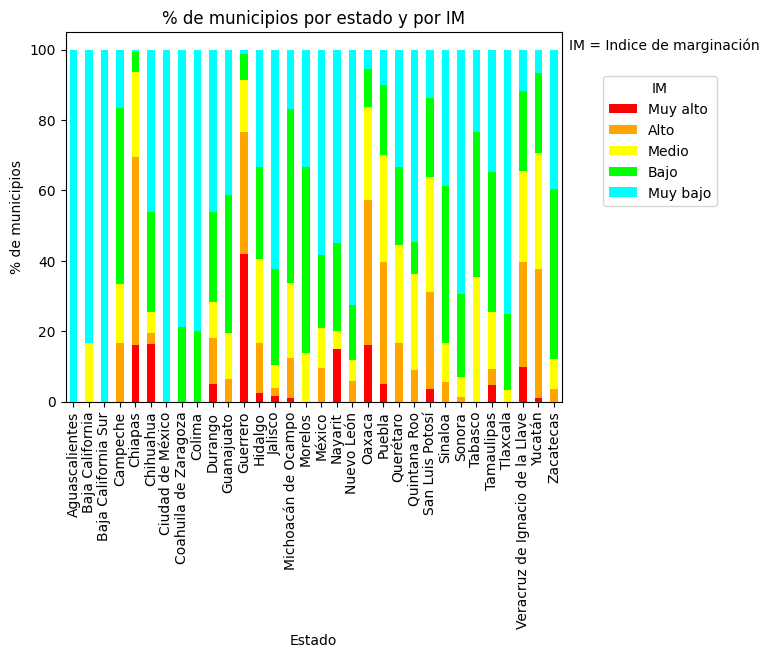

In [6]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# Calcular el conteo de municipios por estado y categoría
estado_municipio_categoria=df[["NOM_ENT", "NOM_MUN", "GM_2020"]]

# Calcular el conteo de municipios por estado y categoría
conteo_municipios = estado_municipio_categoria.groupby(['NOM_ENT', 'GM_2020']).size().unstack()

# Calcular el porcentaje de municipios por categoría
porcentaje_municipios = conteo_municipios.apply(lambda x: x / x.sum() * 100, axis=1)

# Definir el orden jerárquico de las categorías invertido
orden_categorias = ["Muy alto", "Alto", "Medio", "Bajo", "Muy bajo"]

# Reordenar las columnas del DataFrame de acuerdo con el orden jerárquico invertido
porcentaje_municipios = porcentaje_municipios[orden_categorias]

# Definir los colores de las categorías en el orden original
colores_categoria = ["#FF0000", "#FFA500", "#FFFF00", "#00FF00", "#00FFFF"]

# Crear un mapa de colores personalizado con los colores originales
cmap = ListedColormap(colores_categoria)

# Configurar el tamaño de la figura
plt.figure(figsize=(10, 6))

# Crear la gráfica de barras apiladas con los colores originales y orden invertido
porcentaje_municipios.plot(kind='bar', stacked=True, cmap=cmap)

# Configurar los ejes y la leyenda
plt.xlabel('Estado')
plt.ylabel('% de municipios')
plt.title('% de municipios por estado y por IM')
plt.text(32,100,"IM = Indice de marginación")
plt.legend(title='IM', bbox_to_anchor=(1.07, 0.9))

#plt.savefig('carpeta/grafica.jpg')


# Mostrar la gráfica
plt.show()

**d. Realizar una gráfica que muestre el porcentaje de la población, respecto a la población total de cada estado, con índices de marginación "muy bajo", "bajo", "medio", "alto" y "muy alto". Guarda la gráfica en formato jpg**

<Figure size 1000x600 with 0 Axes>

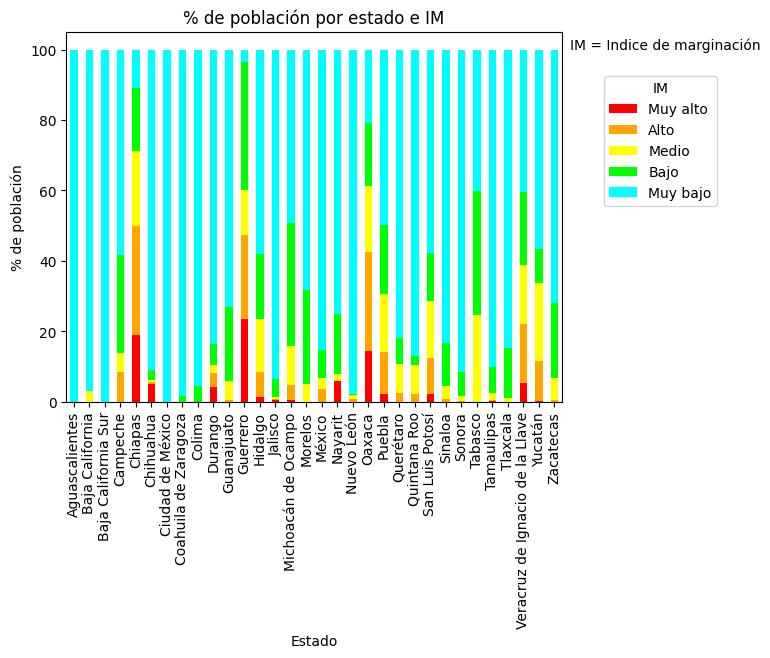

In [7]:

# Calcular la suma de la población por estado y categoría de marginación
poblacion_por_estado = df.groupby(['NOM_ENT', 'GM_2020'])['POB_TOT'].sum().unstack()

# Calcular el porcentaje de la población por categoría de marginación
porcentaje_poblacion = poblacion_por_estado.apply(lambda x: x / x.sum() * 100, axis=1)

# Definir el orden jerárquico de las categorías
orden_categorias = ["Muy alto", "Alto", "Medio", "Bajo", "Muy bajo"]

# Definir los colores asociados a las categorías según la solicitud
colores_categoria = ["#FF0000", "#FFA500", "#FFFF00", "#00FF00", "#00FFFF"]

# Reordenar las columnas del DataFrame de acuerdo con el orden jerárquico
porcentaje_poblacion = porcentaje_poblacion[orden_categorias]

# Configurar el tamaño de la figura
plt.figure(figsize=(10, 6))

# Crear la gráfica de barras apiladas con los colores asociados a las categorías
porcentaje_poblacion.plot(kind='bar', stacked=True, color=colores_categoria)

# Configurar los ejes y la leyenda
plt.xlabel('Estado')
plt.ylabel('% de población')
plt.title('% de población con índices de marginación en cada estado')

# Configurar los ejes y la leyenda
plt.xlabel('Estado')
plt.ylabel('% de población')
plt.title('% de población por estado e IM')
plt.text(32,100,"IM = Indice de marginación")
plt.legend(title='IM', bbox_to_anchor=(1.07, 0.9))

# Mostrar la gráfica
plt.show()

**e. ¿Hay coincidencias entra la gráficas anteriores?  ¿Algún hallazgo? Comenta tu análisis.**

<t align=justify>

El gráfico "Porcentaje de Población con Índices de Marginación en cada Estado" nos brinda una visión más completa de la relevancia de los porcentajes de municipios por estado por índice de marginación (IM) al considerar la distribución de la población en cada categoría de marginación. Este gráfico nos ayuda a comprender cómo se concentra la población en diferentes niveles de marginación dentro de cada estado, lo cual es esencial para evaluar el impacto real de los índices de marginación.

Es posible que un estado aparente tener una proporción significativa de municipios con índices de marginación bajos en el gráfico "Porcentaje de Municipios por Estado por IM". Sin embargo, el gráfico "Porcentaje de Población con Índices de Marginación en cada Estado" nos permite contextualizar esta información al mostrar cómo se distribuye la población en esos municipios. Si gran parte de la población se encuentra en municipios con índices de marginación altos, la relevancia de los municipios con índices bajos puede verse disminuida, ya que la mayoría de la población enfrenta condiciones de marginación más severas.

Por otro lado, este gráfico también nos permite identificar estados donde la mayoría de la población se encuentra en municipios con índices de marginación bajos o medios. Esto sugiere que el estado puede tener una mejor situación socioeconómica en comparación con aquellos estados donde la población se concentra en municipios con índices de marginación alto o muy alto. Esta información es valiosa para comprender la distribución de la población vulnerable y la necesidad de implementar medidas específicas en los municipios con mayores índices de marginación, donde se concentra la población más afectada.

El gráfico "Porcentaje de Población con Índices de Marginación en cada Estado" nos permite evaluar la relevancia y el impacto real de los índices de marginación al considerar la distribución de la población en cada estado. Complementa la información proporcionada por el gráfico "Porcentaje de Municipios por Estado por Categoría" al poner en contexto la distribución de la población en los diferentes niveles de marginación. Esta combinación de gráficas nos brinda una comprensión más completa de la situación socioeconómica de cada estado, permitiendo una toma de decisiones más informada y enfocada en las áreas y poblaciones que requieren mayor atención y acciones específicas para reducir la marginación y promover el desarrollo.

**f. Grafica la relación de porcentaje de analfabetismo respecto al porcentaje de poblaciones en localidades de menos de 5,000 habitantes.**

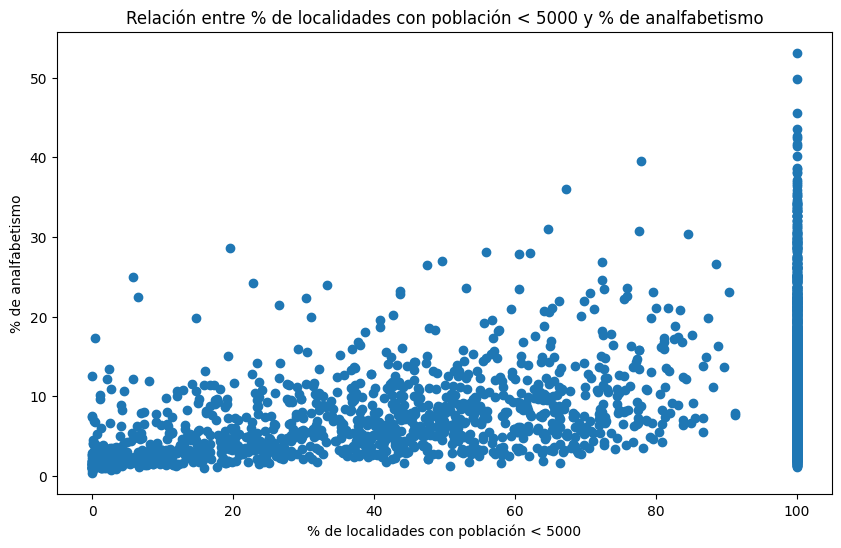

In [10]:
# Extraemos los municipios que contengan menos de 5,000 habitantes
porcentaje_mun_5000 = df['PL.5000']

# Extraemos el porcentaje de analfabetismo
porcentaje_analf = df['ANALF']

# Configurar el tamaño de la figura
plt.figure(figsize=(10, 6))

# Crear el scatter plot
plt.scatter(porcentaje_mun_5000, porcentaje_analf)

# Configurar los ejes y la leyenda
plt.xlabel('% de localidades con población < 5000')
plt.ylabel('% de analfabetismo')
plt.title('Relación entre % de localidades con población < 5000 y % de analfabetismo')

# Mostrar la gráfica
plt.show()

**g. ¿Existe una relación? ¿Cómo podrías analizar con que variable tiene más corelación el porcentaje de analfabetismo en personas mayores de 15 años?**

<t align=justify>

Al analizar la relación entre el porcentaje de municipios con analfabetismo y el porcentaje de localidades en estos municipios con población menor a 5000, no se observa un patrón claro o una correlación significativa. Algunos municipios con alta proporción de localidades con población menor a 5000 habitatens presentan un alto grado de analfabetismo, mientras que otros municipios con una baja proporción de localidades pequeñas también muestran altos niveles de analfabetismo. Esto sugiere que el tamaño de las localidades en sí, no es un factor determinante en el grado de analfabetismo.

Sin embargo, al relacionar el porcentaje de analfabetismo por estado con el porcentaje de Población de 15 años o más sin educación básica por estado, se observa una relación directamente proporcional muy clara. Los estados con un mayor porcentaje de población sin educación básica tienden a tener niveles más altos de analfabetismo. Esto sugiere que el acceso a la educación básica es un factor crítico en la reducción del analfabetismo y que los esfuerzos dirigidos a mejorar la educación básica pueden tener un impacto significativo en la disminución del analfabetismo en cada estado.

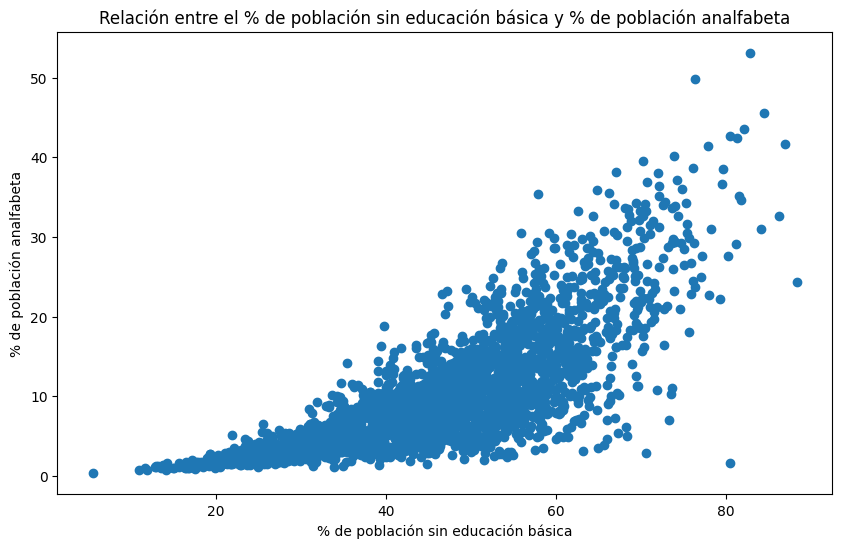

In [14]:
# Extraemos el porcentaje de población de 15 años o mayor sin eduación básica
porcentaje_sin_basica = df['SBASC']

# Configurar el tamaño de la figura
plt.figure(figsize=(10, 6))

# Crear el scatter plot
plt.scatter(porcentaje_sin_basica, porcentaje_analf)

# Configurar los ejes y la leyenda
plt.xlabel('% de población sin educación básica')
plt.ylabel('% de población analfabeta')
plt.title('Relación entre el % de población sin educación básica y % de población analfabeta')

# Mostrar la gráfica
plt.show()

**h. Desarrolla un nuevo DataFrame con indicadores interesantes por estado que se obtengan de los datos a nivel municipal y que pudieran ser de importancia a la hora de definir políticas públicas. Se va a calificar la originalidad de los indicadores. Justifica las decisiones que tomes, y guarda el nuevo dataframe en formato parquet.**

La estructura de nuestro DataFrame consiste en: 


<table>
<caption class="cap">DataFrame</caption>
  <tr>
    <th>Estado</th>
    <th>Indice de marginación educativa</th>
    <th>Indice de marginación de servicios básicos</th>
    <th>Indice de marginación socioeconómica</th>
  </tr>
  <tr>
    <td>...</td>
    <td>...</td>
    <td>...</td>
  </tr>
</table>

*Indice de marginación educativa*

In [15]:
from scipy.stats import zscore

# Calcular el z-score para cada columna
indice_marginacion_educativa = df[["NOM_ENT","ANALF", "SBASC"]]

# Calcular el z-score para cada columna
indice_marginacion_educativa["ANALF_zscore"] = zscore(indice_marginacion_educativa["ANALF"])
indice_marginacion_educativa["SBASC_zscore"] = zscore(indice_marginacion_educativa["SBASC"])

# Calcular el índice de marginación educativa utilizando los z-scores
peso_analfabetismo = 0.3
peso_sin_educacion = 0.7

indice_marginacion_educativa["Indice_marginacion_educativa"] = (peso_analfabetismo * indice_marginacion_educativa["ANALF_zscore"]) + (peso_sin_educacion * indice_marginacion_educativa["SBASC_zscore"])

df_estado = indice_marginacion_educativa.groupby("NOM_ENT")["Indice_marginacion_educativa"].mean()
print(df_estado)

NOM_ENT
Aguascalientes                    -1.067675
Baja California                   -1.115576
Baja California Sur               -1.222920
Campeche                          -0.629213
Chiapas                            0.655204
Chihuahua                          0.073214
Ciudad de México                  -1.780977
Coahuila de Zaragoza              -1.059591
Colima                            -0.811550
Durango                           -0.481204
Guanajuato                        -0.386401
Guerrero                           0.681648
Hidalgo                           -0.508314
Jalisco                           -0.268318
Michoacán de Ocampo                0.300261
Morelos                           -0.805035
México                            -0.939913
Nayarit                           -0.589665
Nuevo León                        -0.859378
Oaxaca                             0.637495
Puebla                             0.294936
Querétaro                         -0.531626
Quintana Roo            

<ipython-input-15-e134f94563b2>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  indice_marginacion_educativa["ANALF_zscore"] = zscore(indice_marginacion_educativa["ANALF"])
<ipython-input-15-e134f94563b2>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  indice_marginacion_educativa["SBASC_zscore"] = zscore(indice_marginacion_educativa["SBASC"])
<ipython-input-15-e134f94563b2>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_index


<t align=justify>

El *índice de marginación educativa* se basa en la combinación de dos variables clave: el porcentaje de analfabetismo y el porcentaje de población sin educación básica. Estas variables son indicadores importantes de la situación educativa de una región y reflejan el nivel de falta de acceso a la educación y la calidad de la formación académica.

La justificación detrás de este índice radica en la importancia de la educación como factor determinante para el desarrollo humano y socioeconómico de una población. La falta de alfabetización y de educación básica limita las oportunidades y el potencial de las personas, dificultando su participación activa en la sociedad, su empleabilidad y su capacidad para mejorar su calidad de vida.

Para la obtención de este índice primeramente se realiza una normalización de los datos de alfabetismo y ausencia de educación básica. Esto se hace utilizando la métrica de z-score. La utilidad de esto radica en que al normalizar nuestros datos, como estamos interesados en combinar dos variable, descartamos la influencia de la distintos grados de variabilidad presentes en estas. 

La combinación de las variables ya normalizadas se lleva a cabo por medio de una suma ponderada. Para esto tuvimos que definir un peso (un número real) asociado a cada variable. Mientras que al porcentaje de analfabetismo le adjudicamos un peso de 0.3, al porcentaje de falta de educación básica le asociamos un peso de 0.7. Estos valores fueron seleccionados desde nuestro criterio, considerando que la educación básica es más relevante, ya que en ella el individuo no solo tiene acceso al dominio de la lectura, sino al de muchas otras áreas del conocimiento. 

El índice de marginación educativa permite comparar y clasificar municipios en términos de su situación educativa. Valores más altos indicarán un mayor grado de marginación educativa, mientras que valores más bajos representarán un mejor acceso a la educación y una menor falta de formación académica.

Este indicador puede ser útil para identificar áreas con mayores necesidades educativas, orientar políticas públicas, asignar recursos y diseñar programas específicos para mejorar la educación en las regiones más marginadas.

*Indice de marginación de servicios básicos*

In [18]:
# Calcular el z-score para cada columna
indice_servicios=df[['NOM_ENT','OVSDE','OVSEE','OVSAE']]
indice_servicios["OVSDE_zscore"] = zscore(indice_servicios["OVSDE"])
indice_servicios["OVSEE_zscore"] = zscore(indice_servicios["OVSEE"])
indice_servicios["OVSAE_zscore"] = zscore(indice_servicios["OVSAE"])

# Definir los pesos para cada variable
peso_sin_drenaje = 0.3
peso_sin_electricidad = 0.4
peso_sin_agua = 0.5

# Calcular el índice de marginación de servicios básicos utilizando los z-scores y los pesos
indice_servicios["Indice_marginacion_servicios"] = (peso_sin_drenaje * indice_servicios["OVSDE_zscore"]) + (peso_sin_electricidad * indice_servicios["OVSEE_zscore"]) + (peso_sin_agua * indice_servicios["OVSAE_zscore"])
indice_servicios=indice_servicios.groupby("NOM_ENT")["Indice_marginacion_servicios"].mean()
# Imprimir el resultado para cada municipio
print(indice_servicios)

NOM_ENT
Aguascalientes                    -0.538071
Baja California                   -0.211699
Baja California Sur               -0.313371
Campeche                           0.083048
Chiapas                            0.257050
Chihuahua                          0.592153
Ciudad de México                  -0.612836
Coahuila de Zaragoza              -0.531390
Colima                            -0.551729
Durango                            0.229762
Guanajuato                        -0.239778
Guerrero                           1.115021
Hidalgo                           -0.132794
Jalisco                           -0.339383
Michoacán de Ocampo               -0.305851
Morelos                           -0.226825
México                            -0.248739
Nayarit                            0.554337
Nuevo León                        -0.426102
Oaxaca                             0.092994
Puebla                            -0.093662
Querétaro                          0.039446
Quintana Roo            

<ipython-input-18-603857e64914>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  indice_servicios["OVSDE_zscore"] = zscore(indice_servicios["OVSDE"])
<ipython-input-18-603857e64914>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  indice_servicios["OVSEE_zscore"] = zscore(indice_servicios["OVSEE"])
<ipython-input-18-603857e64914>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docum


<t align=justify>

El *índice de marginación de servicios básicos* se basa en la importancia de evaluar y comprender la situación de acceso a servicios esenciales en una determinada área geográfica, como lo son las entidades. Estos servicios básicos, como el drenaje, la electricidad y el agua, son fundamentales para el bienestar y la calidad de vida de la población.

Al combinar los porcentajes de ocupantes en viviendas sin drenaje, sin energía eléctrica y sin agua entubada, se obtiene un índice que refleja la falta de acceso a servicios básicos en general, en cada entidad. La suma ponderada de estos porcentajes, utilizando los pesos asignados a cada variable, permite darle mayor importancia a aquellas carencias que se consideren más relevantes.

Tal como en el índice de marginación educativa, en este caso decidimos el peso de cada variable con base en nuestro criterio. Consideramos que la mayor relevancia la tiene el acceso al agua etubada (peso 0.5), seguido por el acceso a la electricidad (peso 0.4) y por último el acceso a drenaje (peso 0.3). 

Este indicador proporciona una medida cuantitativa que facilita la comparación entre entidades y la identificación de aquellos que presentan mayores deficiencias en términos de servicios básicos. Permite visualizar de manera clara y concisa las disparidades y desigualdades existentes en el acceso a servicios esenciales, lo que puede ayudar a orientar políticas públicas, programas de desarrollo y asignación de recursos para mejorar las condiciones de vida de la población en áreas marginadas.

Las entidades con valores bajos en el índice de marginación de servicios básicos indican que tienen un mejor acceso a servicios esenciales como el drenaje, la electricidad y el agua. Esto implica que la infraestructura y los servicios básicos están bien establecidos y disponibles para la mayoría de la población. Estas entidades muestran un nivel más alto de desarrollo y calidad de vida en términos de servicios básicos, lo que puede reflejar una mayor inversión en infraestructura y mejores condiciones de vida para sus habitantes.

Mientras que las entidades con valores altos en el índice de marginación de servicios básicos indican una falta de acceso adecuado a los servicios esenciales mencionados. Estas entidadess enfrentan desafíos significativos en términos de infraestructura y acceso a servicios básicos, lo que puede impactar negativamente en la calidad de vida de su población. Los altos valores del índice sugieren la necesidad de intervenciones y acciones para mejorar la infraestructura y garantizar un acceso equitativo a los servicios básicos en estas áreas marginadas.


*Índice de marginación socioeconómica*


In [19]:
#Calcular el z-score para cada columna
indice_marginacion_socioeconomica=df[['NOM_ENT','OVPT','PO2SM']]
indice_marginacion_socioeconomica["OVPT_zscore"] = zscore(indice_marginacion_socioeconomica["OVPT"])
indice_marginacion_socioeconomica["PO2SM_zscore"] = zscore(indice_marginacion_socioeconomica["PO2SM"])

# Calcular el índice de marginación socioeconómica utilizando los z-scores
peso_piso_tierra = 0.6
peso_ingresos_bajos = 0.4

indice_marginacion_socioeconomica["Indice_marginacion_socioeconomica"] = (peso_piso_tierra * indice_marginacion_socioeconomica["OVPT_zscore"]) + (peso_ingresos_bajos * indice_marginacion_socioeconomica["PO2SM_zscore"])

# Agrupar los datos por estado y calcular el promedio del índice de marginación socioeconómica
indice_marginacion_socioeconomica_promedios_socioeconomico = indice_marginacion_socioeconomica.groupby('NOM_ENT')['Indice_marginacion_socioeconomica'].mean().reset_index()

# Mostrar el dataframe con los promedios
print(indice_marginacion_socioeconomica_promedios_socioeconomico)

                            NOM_ENT  Indice_marginacion_socioeconomica
0                    Aguascalientes                          -0.823613
1                   Baja California                          -0.697470
2               Baja California Sur                          -1.273029
3                          Campeche                          -0.373879
4                           Chiapas                           0.672767
5                         Chihuahua                          -0.410362
6                  Ciudad de México                          -1.380068
7              Coahuila de Zaragoza                          -0.870281
8                            Colima                          -0.797104
9                           Durango                          -0.222551
10                       Guanajuato                          -0.562303
11                         Guerrero                           0.904777
12                          Hidalgo                          -0.315043
13    

<ipython-input-19-f8c693681bd9>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  indice_marginacion_socioeconomica["OVPT_zscore"] = zscore(indice_marginacion_socioeconomica["OVPT"])
<ipython-input-19-f8c693681bd9>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  indice_marginacion_socioeconomica["PO2SM_zscore"] = zscore(indice_marginacion_socioeconomica["PO2SM"])
<ipython-input-19-f8c693681bd9>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row


<t align=justify>

El *índice de marginación socioeconómica* es una medida que combina variables relacionadas con la situación socioeconómica de una entidad, como el porcentaje de viviendas con piso de tierra (OVPT) y el porcentaje de población ocupada con ingresos menores a 2 salarios mínimos (PO2SM). Estas variables reflejan aspectos clave de la marginación socioeconómica, como la calidad de la vivienda y el nivel de ingresos de la población. Al combinar estas variables en un índice, podemos obtener una medida resumida de la marginación socioeconómica en una entidad determinada.

La justificación de utilizar el índice de marginación socioeconómica radica en su capacidad para capturar y cuantificar la desigualdad y la precariedad socioeconómica en una entidad. Al considerar el porcentaje de viviendas con piso de tierra, estamos evaluando la calidad de la vivienda, ya que el piso de tierra es un indicador de condiciones habitacionales deficientes. Por otro lado, el porcentaje de población ocupada con ingresos menores a dos salarios mínimos refleja la vulnerabilidad económica y la falta de recursos financieros para cubrir las necesidades básicas.

Con base en nuestro criterio, le adjudicamos una mayor relevacia a que el piso de las viviendas sea de tierra, con un peso de 0.6; y una menor relevancia a que el ingreso sea menor a dos salarios mínimos, con peso de 0.4.  

Este índice puede ser utilizado para comparar la situación socioeconómica entre diferentes entidades y para identificar aquellas que presentan mayores niveles de marginación socioeconómica. Además, puede ser utilizado como una herramienta para la toma de decisiones en políticas públicas, ya que permite identificar áreas prioritarias que requieren intervenciones específicas para mejorar las condiciones socioeconómicas de la población.

Los valores bajos indican un menor grado de marginación socioeconómica. Esto significa que tienen un menor porcentaje de viviendas con piso de tierra y una menor proporción de población con ingresos bajos. Estos estados tienden a tener mejores condiciones de vivienda y niveles de ingresos más altos en comparación con otros estados.

Los valores altos indican un mayor grado de marginación socioeconómica. Esto implica que tienen un mayor porcentaje de viviendas con piso de tierra y una mayor proporción de población con ingresos bajos en comparación con otros estados. Estos estados enfrentan desafíos significativos en términos de condiciones de vivienda precarias y niveles de ingresos insuficientes.



*Presentación del Dataframe*

In [ ]:
# Agrupar los datos por estado y calcular los promedios
df_indices = df.groupby('NOM_ENT').mean()

# Seleccionar las columnas deseadas
df_indices = df_indices[['Indice_marginacion_educativa', 'Indice_marginacion_servicios','Indice_marginacion_socioeconomica']]

# Eliminar duplicados en la columna 'NOM_ENT'
df_indices = df_indices.reset_index().drop_duplicates(subset='NOM_ENT', keep='first')

# Mostrar el dataframe con los promedios
print(df_indices)

#Así se guardaria el dataframe en formato parquet
#df_indices.to_parquet("ruta/del/archivo.parquet")


                            NOM_ENT  Indice_marginacion_educativa  \
0                    Aguascalientes                     -1.067675   
1                   Baja California                     -1.115576   
2               Baja California Sur                     -1.222920   
3                          Campeche                     -0.629213   
4                           Chiapas                      0.655204   
5                         Chihuahua                      0.073214   
6                  Ciudad de México                     -1.780977   
7              Coahuila de Zaragoza                     -1.059591   
8                            Colima                     -0.811550   
9                           Durango                     -0.481204   
10                       Guanajuato                     -0.386401   
11                         Guerrero                      0.681648   
12                          Hidalgo                     -0.508314   
13                          Jalisc

<ipython-input-15-efeb83f20d6e>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_indices = df.groupby('NOM_ENT').mean()


El empleo en conjunto de estas tres variables ofrecen un panorama concreto con respecto a los distintos puntos relacionados con la marginación de México